In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numba import jit
plt.style.use('ggplot')

In [2]:
def hamming_distance(list1, list2):
    
    dist = 0
    for n in range(len(list1)):
        if list1[n] != list2[n]:
            dist += 1
            
    return dist

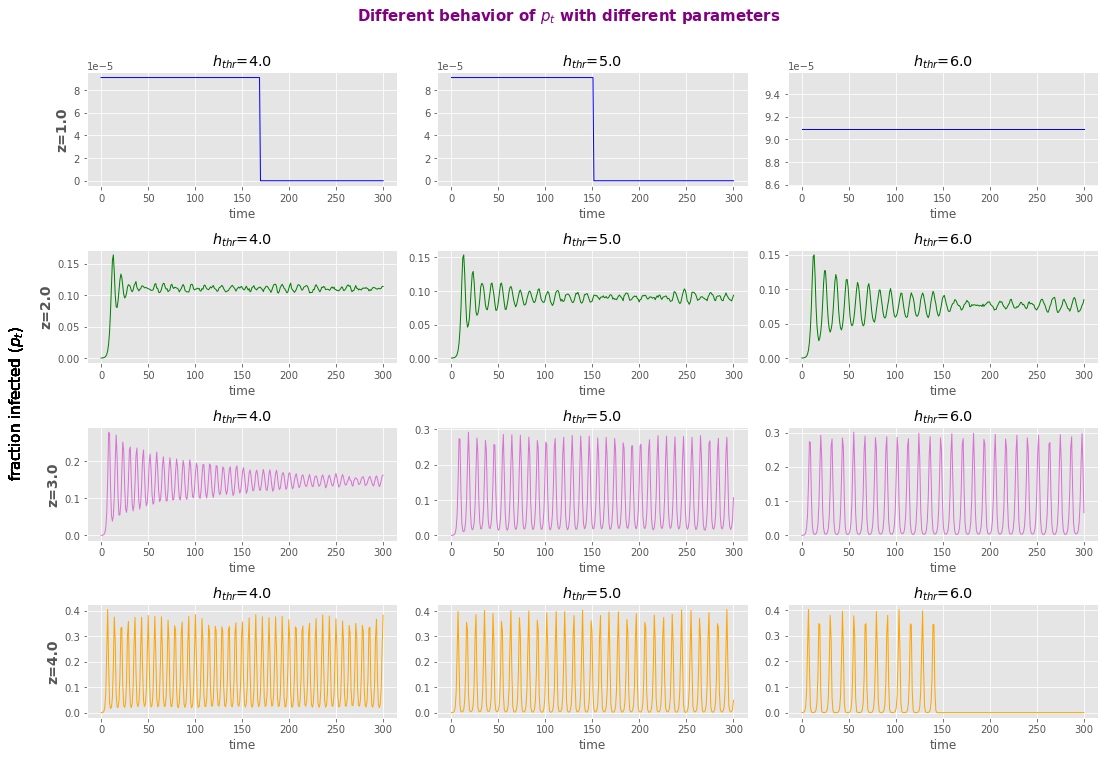

In [20]:
# First model: simulations for linear mutation

def FirstModel(population_size, h_thr, z, str_leng, mutation_rate, max_time):
    
    indiv = {}   # memory repertoir for individuals
    for i in range(population_size):
        indiv[i] = [0,[]]
    
    for time in range(max_time):
        
        if time == 0:
            
            bits = [0 for i in range(str_leng)]   # bitstrings for pathogens
            
            r0 = random.randint(0,population_size-1)
            indiv[r0] = [1,[bits]]
    
            prob = np.zeros(max_time)    # fraction infected at time t
            prob[0] = 1/population_size
            
        else: 
            
            bits = bits.copy()
            bits[time-1] = 1    # mutation
            
            infec = [i for i in range(population_size) if indiv[i][0]==1]   # infected individuals
            expo = set()   
           
            for i in infec:
                exc_list = list(np.r_[0:i, i+1:population_size])
                expo = expo.union(random.sample(exc_list, z))   # exposed indivuals
                
                
            # adding the strain to individual's memory    
            for i in expo:
                if indiv[i][1] == []:
                    indiv[i][0] = 1
                    indiv[i][1].append(bits)   
                    
                else:
                    h_min = str_leng + 1
                    for genes in indiv[i][1]:
                        d = hamming_distance(genes, bits)
                        h_min = min(h_min, d)
                    if h_min > h_thr:
                        indiv[i][0] = 1
                        indiv[i][1].append(bits) 
                                    
            for i in infec:
                indiv[i][0] = 0    
     
            prob[time] = len([i for i in range(population_size) if indiv[i][0]==1]) / population_size  
            
            
    return prob  


def FirstPlots(population_size, hvec, zvec, str_leng, mutation_rate, max_time):
    
    fig, ax = plt.subplots(len(zvec),len(hvec), figsize=(15,10))
    t = np.linspace(0, max_time, max_time)
   
    for i, z in enumerate(zvec):
        for j, h_thr in enumerate(hvec):
            
            col = ['b','g','orchid','orange','cornflowerblue','r']
            prob = FirstModel(population_size, h_thr, z, str_leng, mutation_rate, max_time)
            
            ax[i,j].plot(t, prob, color=col[i], linewidth=1)
            ax[i,j].set_title(r'$h_{thr}$=%1.1f' %h_thr)
            ax[i,j].set_xlabel('time')
            ax[i,0].set_ylabel('z=%1.1f' %z, fontsize=14, fontweight='bold')
            fig.text(-0.02, 0.5, 'fraction infected ($p_t$)', va='center', rotation='vertical', fontsize=15)
            plt.suptitle('Different behavior of $p_t$ with different parameters', y=1.05\
                         ,color='purple', fontsize=15, fontweight='bold')
            plt.tight_layout()
            plt.savefig('p1.png')
            
hvec = [4,5,6]
zvec = [1,2,3,4] 
population_size = 11000
max_time = 300
str_leng = 300
mutation_rate = 1
FirstPlots(population_size, hvec, zvec, l, mutation_rate, max_time)

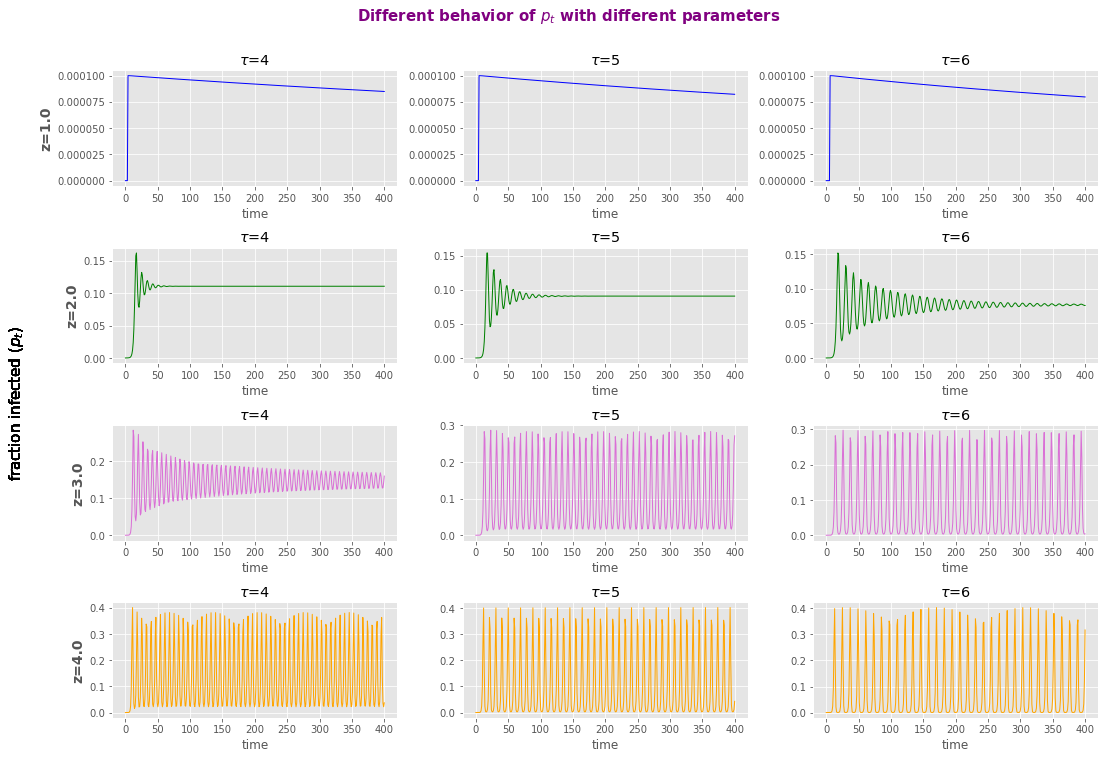

In [22]:
# Analytical Solution

def FractionInfected(tau, z, T):
    
    p = np.zeros(T)  # fraction infected
    p[tau] = 10**-4
    
    for t in range(tau, T-1): 
        p[t+1] = (1-np.exp(-z*p[t]))*(1-sum([p[t-i] for i in range(tau)]))
        
    return p


def plots(tauvec, zvec, T):
    
    fig, ax = plt.subplots(len(zvec),len(tauvec), figsize=(15,10))
    t = np.linspace(0, T, T)
   
    for i, z in enumerate(zvec):
        for j, tau in enumerate(tauvec):
            
            col = ['b','g','orchid','orange','cornflowerblue','r']
            p = FractionInfected(tau, z, T)
            
            ax[i,j].plot(t, p, color=col[i], linewidth=1)
            ax[i,j].set_title(r'$\tau$={}'.format(tau))
            ax[i,j].set_xlabel('time')
            ax[i,0].set_ylabel('z=%1.1f' %z, fontsize=14, fontweight='bold')
            fig.text(-0.02, 0.5, 'fraction infected ($p_t$)', va='center', rotation='vertical', fontsize=15)
            plt.suptitle('Different behavior of $p_t$ with different parameters', y=1.05\
                         ,color='purple', fontsize=15, fontweight='bold')
            plt.tight_layout()
            plt.savefig('p2.png')
            
            
            
T  = 400
tauvec = [4, 5, 6]
zvec = [1, 2, 3, 4] 

plots(tauvec, zvec, T)
